# SVM-classifier 

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

## Load data

In [2]:
# load breast-cancer dataset
bc = datasets.load_breast_cancer()

# create a pandas dataframe and add the target column
cancer = pd.DataFrame(data=bc.data, columns=bc.feature_names)
cancer['target'] = bc.target

cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
print('Number of features (columns):', len(cancer.columns))
print(cancer.columns)

Number of features (columns): 31
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


#### Legend: 0 malignant cancer, 1 benign cancer

In [4]:
cancertype = dict( zip( np.unique(bc.target), bc.target_names ) ) 
for i in range(len(cancertype)):
    print('%d means %s' %(i,cancertype[i]))
#endfor

0 means malignant
1 means benign


#### Plot a pair plot using the first six features of the dataset

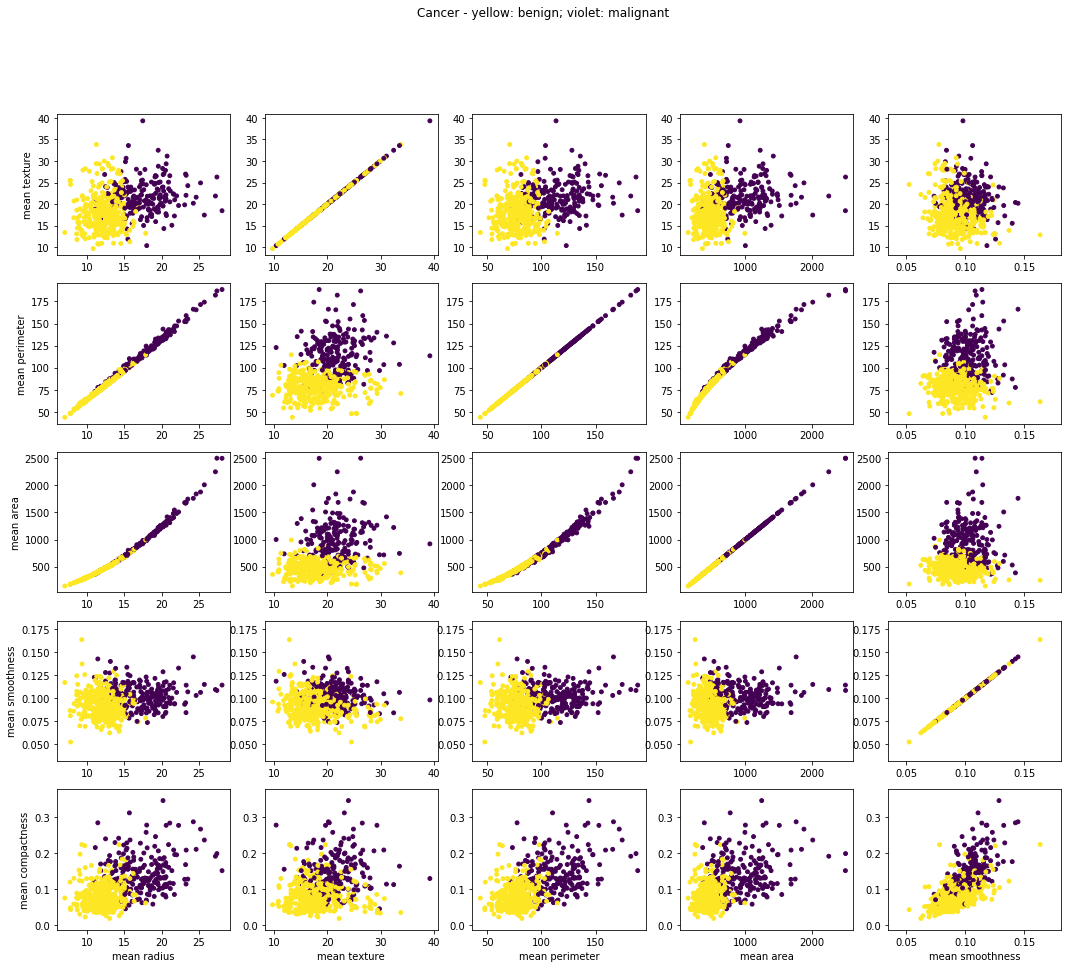

In [5]:
fig, ax = plt.subplots(5, 5, figsize=(18, 15))
plt.suptitle('Cancer - yellow: benign; violet: malignant')
for i in range(5):
    for j in range(5):
        ax[i, j].scatter(cancer.iloc[:,j], cancer.iloc[:,i + 1], s=15, marker='o', c=cancer['target'])
        if i == 4:
            ax[i, j].set_xlabel(cancer.columns[j])
        #endif
        if j == 0:
            ax[i, j].set_ylabel(cancer.columns[i+1])
        #endif
    #endfor
#endfor

#### Let us focus on the first five features versus mean compactness (the 6th feature)

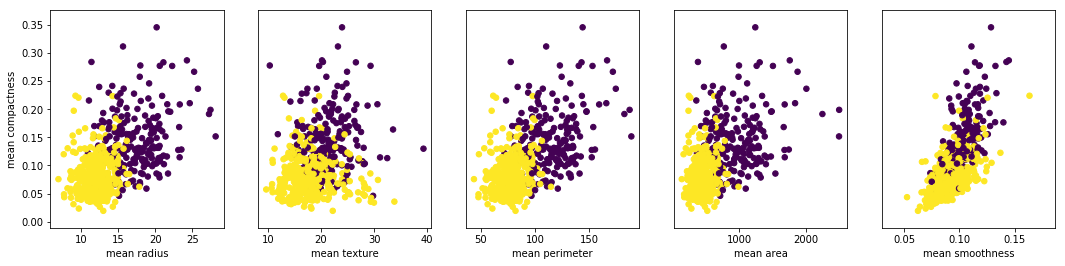

In [6]:
fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for j in range(1, 6):
    ax = fig.add_subplot(1, 5, j)
    ax.scatter(cancer.iloc[:,j-1], cancer['mean compactness'], s=30, marker='o', c=cancer['target'])
    ax.set_xlabel(cancer.columns[j-1])
    if j == 1:
        ax.set_ylabel('mean compactness')
    elif j > 1:
        ax.set_yticks([])
    #endif
#endfor

## SVM with linear kernel

A SVM that uses a *linear* kernel builds an $(d-1)$-dimensional hyperplane in $\mathbb{R}^d$ (where $d$ is the number of features used to build the model) which separates the data instances. In general, the hyperplane is given by 
$$
\gamma + \beta_0 x_1 + \dots + \beta_{d-1} x_d = 0,
$$
with the $(d+1)$ coefficients $(\gamma,\beta_0,\dots,\beta_{d-1})$ obtained by calling the ".fit" method for a given instance of svm. 

For each pair of features in the figure above we run a SVM to predict wheter a cancer is benign or malignant. 
In this case ($d=2$), in each of the plot above, we can also plot the $1$-dimensional hyperplane (a line) which separates the data. In particular, we can rewrite the *decision boundary* line
$$
\gamma + \beta_0 x + \beta_1 y = 0,
$$
as 
$$
y = m x + b
\qquad\text{where}\qquad 
m = - \frac{\beta_0}{\beta_1},
\;\; 
b = - \frac{\gamma}{\beta_1}.
$$

In [12]:
def gethyperplane(linearclf,data,x):
    m = - linearclf.coef_[0][0] / linearclf.coef_[0][1]
    b = - linearclf.intercept_ / linearclf.coef_[0][1]
    return m * x + b
#endfunction

prediction score [mean radius, mean compactness]:  	89.5%
prediction score [mean texture, mean compactness]:  	76.9%
prediction score [mean perimeter, mean compactness]:  	91.6%
prediction score [mean area, mean compactness]:  	90.2%
prediction score [mean smoothness, mean compactness]:  	67.8%


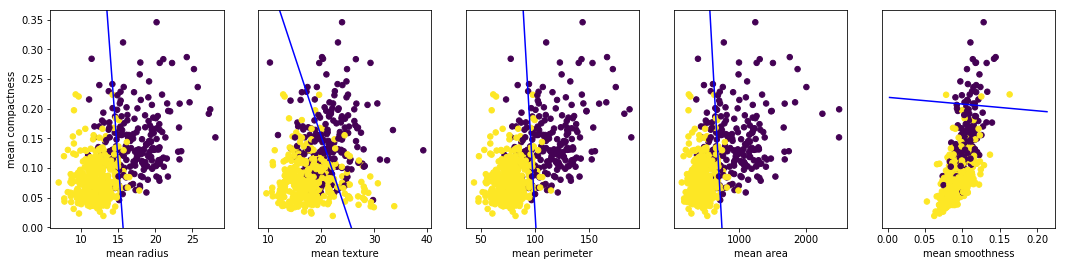

In [13]:
fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for j in range(1, 6):
    # get current traindata
    colname = cancer.columns[j-1]
    traindata = cancer[[colname,'mean compactness']]
    
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(traindata, cancer['target'], random_state=0)

    # build the svm model
    svmclf = SVC(C=1, kernel='linear', gamma='auto')
    svmclf.fit(X_train,y_train)
    
    # get the svm line (1D hyperplane)
    xx = np.linspace(traindata.iloc[:,0].min() - 0.05, traindata.iloc[:,0].max() + 0.05, 40)
    yy = gethyperplane(svmclf,traindata,xx)
        
    # plot data and hyperplane
    ax = fig.add_subplot(1, 5, j)
    ax.scatter(cancer.iloc[:,j-1], cancer['mean compactness'], s=30, marker='o', c=cancer['target'])
    ax.plot(xx,yy,'b-')
    ax.set_xlabel(cancer.columns[j-1])
    ax.set_ylim([traindata.iloc[:,1].min() - 0.02, traindata.iloc[:,1].max() + 0.02])
    if j == 1:
        ax.set_ylabel('mean compactness')
    elif j > 1:
        ax.set_yticks([])
    #endif
    
    # prediction and accuracy 
    score = svmclf.score(X_test, y_test)
    print('prediction score [%s, mean compactness]:  \t%.1f%%' %(colname,score*100))
#endfor

The blue lines represent the decision boundary lines computed by the svm trained used the train dataset. 

The score represents the percentage of right prediction (using the test dataset), i.e., 
$$
\text{score} = \frac{\text{predicted targets for the test set}}{\text{right targets of the test set}}.
$$

We see that the predicted answers for the test set based on sequences of only two features of the entire dataset is not in general very good. In particular, we see that if we considered the mean smoothness and the mean compactness (5th plot) we were predicting a right answer only in about 68% of cases.

#### Repeat the prediction using all features in the data set
We train the model many times and compute the average score.

In [14]:
scores = []

# get all features
traindata = cancer.drop(columns=['target'])
    
for k in range(20):
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(traindata, cancer['target'])

    # build the svm model
    svmclf = SVC(C=1, kernel='linear', gamma='auto')
    svmclf.fit(X_train,y_train)
  
    # prediction and accuracy 
    score = svmclf.score(X_test, y_test)
    scores.append(score)
#endfor

print('prediction score (all features): %.1f%%' %(np.mean(scores)*100))

prediction score (all features): 95.8%


It is (of course) better to use all features available so that to train the svm model using more information. 

## The action of different svm kernels

#### Load the Iris data set

In [3]:
iris = datasets.load_iris()
print('Features:    ', iris.feature_names)    # .features shows the name columns
print('Target names:', iris.target_names)     # .target_names show the labels

Features:     ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


#### Legend: 0 denotes setosa; 1 denotes versicolor; 2 denotes virginica

In [4]:
species = dict( zip( np.unique(iris.target), iris.target_names ) ) 
for i in range(len(species)):
    print('%d means %s' %(i,species[i]))
#endfor

0 means setosa
1 means versicolor
2 means virginica


In [5]:
# create dataframe and add the target feature 
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Visualise the iris dataset

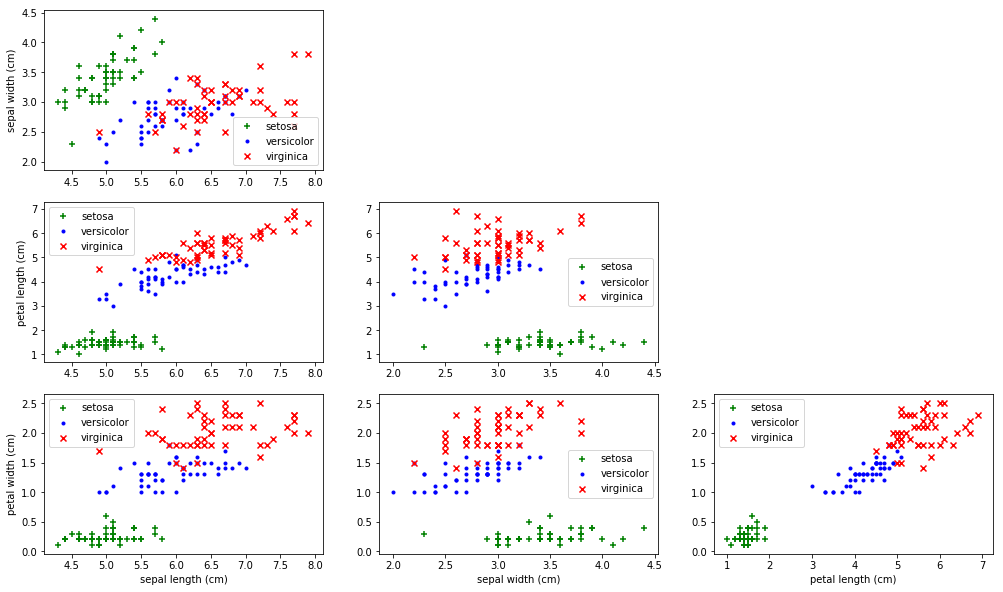

In [6]:
colors    = ['green', 'blue', 'red']
targnames = iris.target_names
markers   = ['+','.','x']

def plotdata(ax,data,target,targnames,colors,markers):
    # number of classes
    nclass = len( np.unique(target) )
    for i in range(nclass):
        xs = data[target == i].iloc[:,0]
        ys = data[target == i].iloc[:,1]
        ax.scatter(xs, ys, c=colors[i], marker=markers[i])
        ax.legend(targnames)
    #endfor
#endfunction

fig, ax = plt.subplots(3, 3, figsize=(17, 10))
for i in range(3):
    for j in range(3):        
        if j <= i:
            plotdata(ax[i, j],irisdf.iloc[:,[j,i+1]],irisdf['target'].values,targnames,colors,markers)
        else:
            ax[i, j].set_visible(False)
        #endif
        if i == 2:
            ax[i, j].set_xlabel(irisdf.columns[j])
        #endif
        if j == 0:
            ax[i, j].set_ylabel(irisdf.columns[i+1])
        #endif
    #endfor
#endfor

#### Train test split of the dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(irisdf.drop(columns="target"), iris['target'], random_state=0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [8]:
# We found a new iris flower 
X_new = np.array([[7.4, 2.3, 2.3, 0.9]])

In [9]:
# Set of kernels 
kernels = ['linear','poly','rbf']

print('Prediction using different kernels:')
for ker in kernels:
    # svm classifier
    svmclf = SVC(C=1, kernel=ker, gamma='auto')
    
    # training
    svmclf.fit(X_train, y_train)
    
    # predict the species of the new iris data
    prediction = svmclf.predict(X_new)
    
    # print prediction
    print(' * %s kernel:  \t%s' %(ker, species[prediction[0]]))
#endfor

Prediction using different kernels:
 * linear kernel:  	versicolor
 * poly kernel:  	versicolor
 * rbf kernel:  	versicolor


All svm classifiers predicted a versicolor iris 

#### Plot of the decision boundaries

In [10]:
# color map for plotting the decision boundaries
cmap = ListedColormap(['#AAFFAA','#AFEEEE','#FFA500'])

In [11]:
# Create a mesh for plot the decision boundaries and assign the predicted values
def createmesh(data,datatrain,CC,kern):
    # two-by-two classifier
    svmclf2 = SVC(C=CC, kernel=kern, gamma='auto')
    svmclf2.fit(data,datatrain)
    # here, data has 2 columns
    eps = 0.5
    hh  = 0.03 
    x_min, x_max = data.iloc[:,0].min() - eps, data.iloc[:,0].max() + eps
    y_min, y_max = data.iloc[:,1].min() - eps, data.iloc[:,1].max() + eps
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hh), np.arange(y_min, y_max, hh))
    Z = svmclf2.predict( np.c_[xx.ravel(), yy.ravel()] )
    Z = Z.reshape(xx.shape)
    return xx, yy, Z
#endfunction

def pairplotprediction(Xtrain,ytrain, CC, kern, *args, **kwargs): 
    # optional parameters
    suptitle = kwargs.get('suptitle', None)
    pred     = kwargs.get('pred',     None)
    targpred = kwargs.get('targpred', None)
    boundary = kwargs.get('bound',    1)

    fig, ax = plt.subplots(3, 3, figsize=(17,10))

    for i in range(3):
        for j in range(3):
            
            if j <= i:            
                # extract current pair of data
                datatobeplot = Xtrain.iloc[:,[j,i+1]]#np.column_stack( (Xtrain[:,j],Xtrain[:,i+1]) ) 
                
                if boundary == 1:
                    # plot the decision boundaries for current pairs of data 
                    #extdata = np.column_stack((datatest[:,j], datatest[:,i+1]))                              
                    xx,yy,Z = createmesh(datatobeplot,ytrain,CC,kern)
                    ax[i,j].pcolormesh(xx, yy, Z, cmap=cmap)  
                #endif 

                # plot the current pairs of data of the train set 
                plotdata(ax[i,j],datatobeplot,ytrain,targnames,colors,markers)

                # check if predicted point(s) have to be plotted as well
                if pred is not None:
                    if targpred is None:
                        # plot predicted points (in this case pred is an array)
                        ax[i,j].scatter(pred[:,j], pred[:,i+1], s=50, marker='*', color='black')
                    else:
                        # plot the test set (in this case pred is DataFrame)
                        ax[i,j].scatter(pred.iloc[:,j], pred.iloc[:,i+1], s=40, marker='o', c=targpred) 
                    #endif
                #endif        
            else:
                ax[i, j].set_visible(False)
            #endif
            
            if i == 2:
                ax[i, j].set_xlabel(Xtrain.columns[j])
            #endif
            if j == 0:
                ax[i, j].set_ylabel(Xtrain.columns[i+1])
            #endif
        #endfor
    #endfor
#endfunction

### Decision boundaries and new point using linear kernel

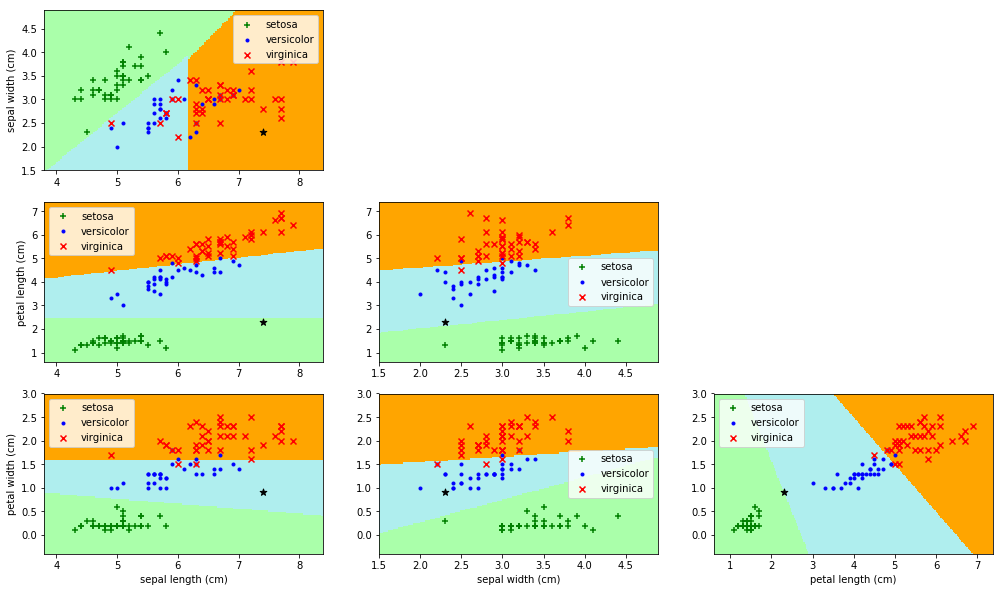

In [12]:
pairplotprediction(X_train,y_train,1,'linear',pred=X_new,bound=1)

### Decision boundaries and new point using polynomial kernel

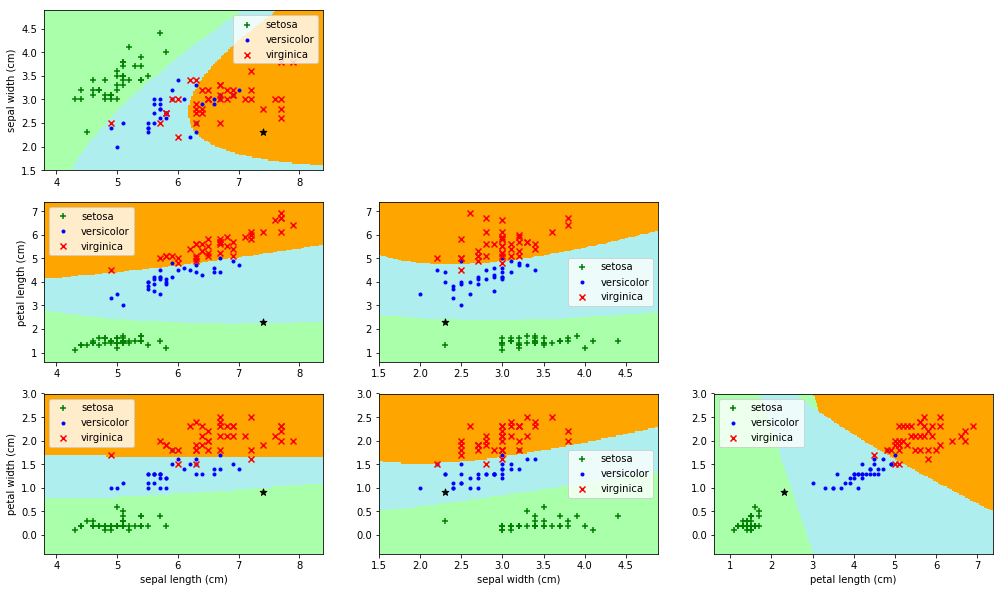

In [13]:
pairplotprediction(X_train,y_train,1,'poly',pred=X_new,bound=1)

### Decision boundaries and new point using radial-basis-function kernel

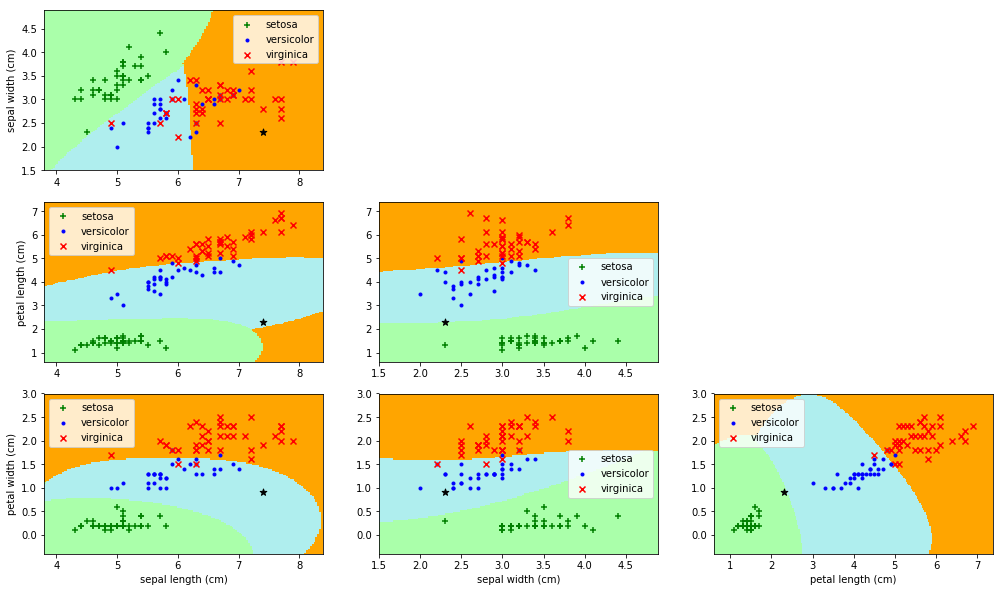

In [14]:
pairplotprediction(X_train,y_train,1,'rbf',pred=X_new,bound=1)

### Decision boundaries and the entire test set using radial-basis-function kernel

In [17]:
# Transform the y_test array (of 0,1,2) to a Series of associated colours
yy_test = pd.Series(y_test).map({0:'green',1:'blue',2:'red'})
yy_test.head(10)

0      red
1     blue
2    green
3      red
4    green
5      red
6    green
7     blue
8     blue
9     blue
dtype: object

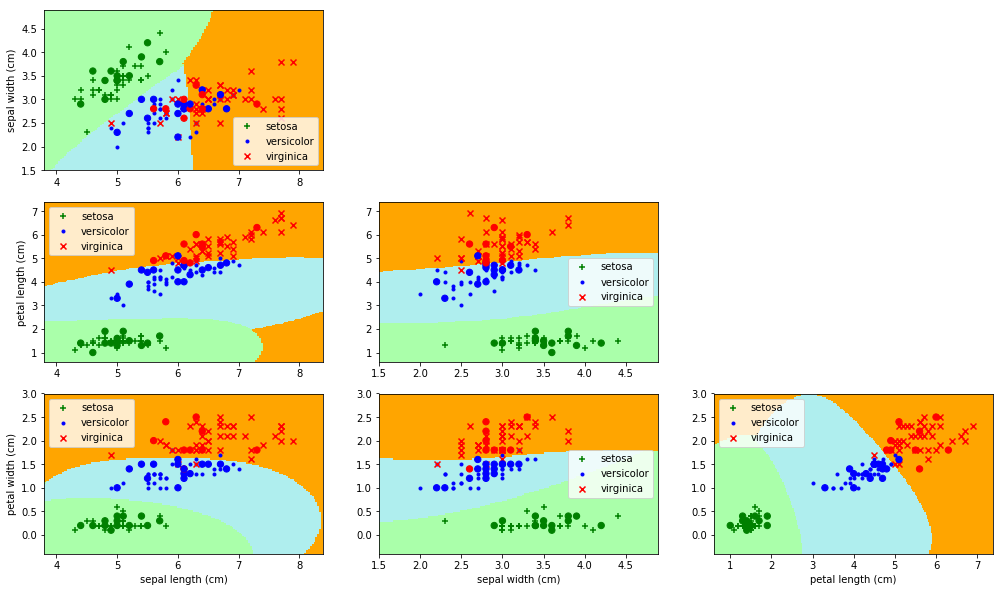

In [18]:
pairplotprediction(X_train,y_train,1,'rbf',pred=X_test,targpred=yy_test,bound=1)

# Evaluation of the model

In [19]:
from sklearn import metrics

### Confusion matrix 

To evaluate the model we can use score (which returns the percentage of right predicted instances) as well as the **confusion matrix**. 

The confusion matrix contains in the position $(i,j)$ the number of instances $i$ that are predicted to be in class $j$. A classifier that returns all right predictions would have a confusion matrix with only numbers on the main diagonal. 

For example, in our case, where $0$ is setosa, $1$ is versicolor, and $2$ is virginica, a number in position $(0,1)$ of the confusion matrix denotes the number of setosa instances that are classified as versicolor. 

In [23]:
# Linear svm
X_train, X_test, y_train, y_test = train_test_split(irisdf.drop(columns="target"), iris['target'], random_state=0)
svmclf = SVC(C=1, kernel='linear', gamma='auto')
svmclf.fit(X_train, y_train)

# predict the test set
y_pred = svmclf.predict(X_test)

# compute the score
score  = svmclf.score(X_test,y_test)
print('score:', score)

# find number of wrong prediction
nwrong = len( np.where(abs(y_pred - y_test)) )
print('no. bad prediction(s):', nwrong)

# get the confusion matrix 
print('confusion matrix:')
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm) 

score: 0.9736842105263158
no. bad prediction(s): 1
confusion matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


We see that there is only 1 wrong prediction. In particular, this was a versicolor iris that have been classified as virginica.

### Classification report 

The *classification report* provides another couples of evaluation metrics. These functions assume a binary classification problem and two classes. 

For example, in our case, let us consider the *positive* class to be setosa 
and the second *negative* class to be the rest, i.e., versicolor plus virginica. 
In particular, we have the following labels: 
  * **TP**: True Positive - this is a setosa instance classified as setosa
  * **FP**: False Positive - this is either a versicolor or virginica classified as setosa
  * **FN**: False Negative - this is setosa classified as either versicolor or virginica
  * **TN**: True Negative - this either a versicolor or virginica classified as versicolor or virginica (accordingly)

Basically TPs and TNs identify elements on the main diagonal, whereas FPs and FNs identify elements outside the main diagonal of the confusion matrix. We can then define the following two metrics:

  - **precision**: the proportion of instances predicted as *positives* that are correctly evaluated
    $$
    \text{precision} := \frac{\text{TP}}{\text{TP+FP}}
    $$
    That is, **for a fixed column** of the confusino matrix, this is nothing but that 
    the diagonal element divided by the sum of the column.
  - **recall**: this is the proportion of *positive* instances that are correctly evaluated 
    $$
    \text{recall} := \frac{\text{TP}}{\text{TP+FN}} 
    $$
    That is, **for a fixed row** of the confusino matrix, this is nothing but that 
    the diagonal element divided by the sum of the row.
  - **F1 score**: this metric is defined as 
    $$
    \text{F1 score} := 2 \frac{\text{precision} \cdot \text{recall}}{\text{precision+recall}} 
    $$


In [44]:
print('setosa:')
setosa_prec = round( cm[0,0] / np.sum(cm[:,0]) , 2)   # using columns
setosa_rec  = round( cm[0,0] / np.sum(cm[0,:]) , 2)   # using rows
setosa_f1   = round( 2 * (setosa_prec * setosa_rec) / (setosa_prec + setosa_rec) , 2)
print('  precision = {}'.format(setosa_prec)) 
print('  recall    = {}'.format(setosa_rec))  
print('  F1-score  = {}\n'.format(setosa_f1)) 

print('versicolor:')
versi_prec = round( cm[1,1] / np.sum(cm[:,1]) , 2)   # using columns
versi_rec  = round( cm[1,1] / np.sum(cm[1,:]) , 2)   # using rows
versi_f1   = round( 2 * (versi_prec * versi_rec) / (versi_prec + versi_rec) , 2)
print('  precision = {}'.format(versi_prec)) 
print('  recall    = {}'.format(versi_rec))  
print('  F1-score  = {}\n'.format(versi_f1)) 

print('virginica:')
virgi_prec = round( cm[2,2] / np.sum(cm[:,2]) , 2)   # using columns
virgi_rec  = round( cm[2,2] / np.sum(cm[2,:]) , 2)   # using rows
virgi_f1   = round( 2 * (virgi_prec * virgi_rec) / (virgi_prec + virgi_rec) , 2)
print('  precision = {}'.format(virgi_prec)) 
print('  recall    = {}'.format(virgi_rec))  
print('  F1-score  = {}'.format(virgi_f1)) 

setosa:
  precision = 1.0
  recall    = 1.0
  F1-score  = 1.0

versicolor:
  precision = 1.0
  recall    = 0.94
  F1-score  = 0.97

virginica:
  precision = 0.9
  recall    = 1.0
  F1-score  = 0.95


There is a function who handle these computations for us:

In [43]:
print(metrics.classification_report(y_test,y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



We have that, for the setosa class, *precision* equal to $1$ and *recall* equal to $1$. 
This means that, respectively,
  - $100\%$ of the instances that are classified as setosa are effectively setosa instances, 
  - $100\%$ of the setosa instances are correctly classified (as setosa).

On the other hand, for the versicolor class, *precision* equal to $1$ and *recall* equal to $0.94$ means that, respectively, 
  - $100\%$ of the instances classified as versicolor are effectively versicolor instances, 
  - only $94\%$ of the versicolor instances are correctly classified (as versicolor).

### Sensitivity of the confusion matrix to different sizes of the train set 

In [32]:
testsize = [0.2, 0.4, 0.8, 0.9]

for ts in testsize:
    # Linear svm
    X_train, X_test, y_train, y_test = train_test_split(irisdf.drop(columns="target"), iris['target'], test_size=ts)
    svmclf = SVC(C=1, kernel='linear', gamma='auto')
    svmclf.fit(X_train, y_train)
    
    # predict the test set
    y_pred = svmclf.predict(X_test)
    print('confusion matrix (train size=%.1f, test size=%.1f):' %(1-ts, ts))
    print(metrics.confusion_matrix(y_test,y_pred))
#endfor

confusion matrix (train size=0.8, test size=0.2):
[[13  0  0]
 [ 0  6  2]
 [ 0  0  9]]
confusion matrix (train size=0.6, test size=0.4):
[[17  0  0]
 [ 0 18  1]
 [ 0  1 23]]
confusion matrix (train size=0.2, test size=0.8):
[[37  0  0]
 [ 0 38  2]
 [ 0  1 42]]
confusion matrix (train size=0.1, test size=0.9):
[[47  0  0]
 [ 0 45  0]
 [ 0 12 31]]


As expected, observe that if we build the svm model with few train data (train size equal to $10\%$ of the full data set), the accuracy decreases, in particular, in the classification of versicolor and virginica instances.

### Mean scores

Let us build the model, for the three different kernels, $n$ times, and then for each kernel used, we compute the mean score.

In [33]:
n = 100

print('Scores using different kernels:')
for ker in kernels:
    scores = []
    for k in range(n):
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(irisdf.drop(columns="target"), iris['target'])
        # svm classifier
        svmclf = SVC(C=1, kernel=ker, gamma='auto')
        # training
        svmclf.fit(X_train, y_train)
        # compute the score
        score = svmclf.score(X_test,y_test)
        scores.append(score)
    #endif
    # print the mean score
    print(' * mean score (%s kernel): \t%.5f' %(ker, np.mean(scores)))
#endfor

Scores using different kernels:
 * mean score (linear kernel): 	0.97921
 * mean score (poly kernel): 	0.96368
 * mean score (rbf kernel): 	0.97079


Overall, the model using the three different kernels have the same accuracy.